<a href="https://colab.research.google.com/github/niksisons/image_processing/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_OpenCV_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Основные методы OpenCV. Часть №1**

---

# **Тема №1. Чтение, запись и отображение**



## **Задание 1:**  
Напишите процедуру, которая:

- Считывает цветное изображение в режиме `cv2.IMREAD_COLOR`.
- Преобразует его в оттенки серого с использованием `cv2.cvtColor()`.
- Сохраняет полученное черно-белое изображение на диск.
- Отображает оба изображения (оригинальное цветное и преобразованное черно-белое).




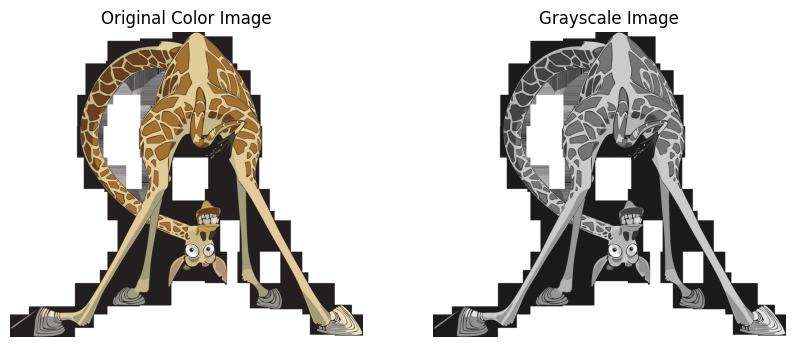

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def process_image(input_path, output_path):
    img_color = cv2.imread(input_path, cv2.IMREAD_COLOR)

    if img_color is None:
        print(f"Error: Could not read image from {input_path}")
        return

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(output_path, img_gray)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title("Original Color Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.show()


process_image('input.png', 'output_gray.png')

## **Задание 2:**  
Используя режим `cv2.IMREAD_UNCHANGED`, загрузите изображение с альфа-каналом (например, PNG с прозрачностью). Затем:

- Разделите изображение на каналы (B, G, R, A).
- Создайте новое изображение, где прозрачность (альфа-канал) инвертирована (т.е. прозрачные области становятся непрозрачными и наоборот).
- Сохраните и отобразите полученное изображение.

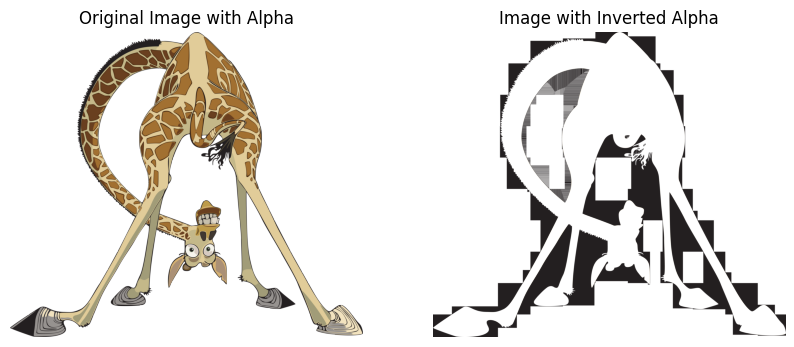

In [ ]:
def process_alpha_image(input_path, output_path):
    img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    b, g, r, a = cv2.split(img)

    a_inv = cv2.bitwise_not(a)

    img_new = cv2.merge((b, g, r, a_inv))

    cv2.imwrite(output_path, img_new)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA))
    plt.title("Original Image with Alpha")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGRA2RGBA))
    plt.title("Image with Inverted Alpha")
    plt.axis('off')

    plt.show()

process_alpha_image('input.png', 'output_alpha_inv.png')

---

# **Тема №2. Работа с цветовыми палитрами**



## **Задание 3:**  
Напишите процедуру, которая:

- Считывает цветное изображение.
- Преобразует его из цветового пространства BGR в HSV с помощью `cv2.cvtColor()`.
- Увеличивает насыщенность (канал S) в 1.5 раза, не превышая максимального значения.
- Преобразует изображение обратно в цветовое пространство BGR.
- Отображает оригинальное и полученное изображения рядом для сравнения.

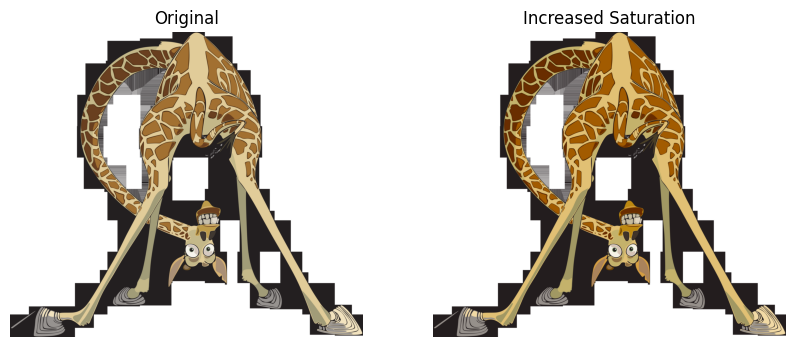

In [ ]:
def process_hsv(input_path):
    img = cv2.imread(input_path)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    h, s, v = cv2.split(hsv)

    s = np.clip(s * 1.5, 0, 255).astype(np.uint8)

    hsv_new = cv2.merge((h, s, v))

    img_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title("Increased Saturation")
    plt.axis('off')

    plt.show()

process_hsv('input.png')

## **Задание 4:**  
Напишите процедуру, которая:

- Считывает изображение и Преобразует его в цветовое пространство YCrCb.
- Применяет размытие к компоненте яркости Y (при помощи фильтра, см. материал предыдущих занятий).
- Снова Преобразует изображение в цветовое пространство BGR.
- Отображает исходное и размытое изображения.

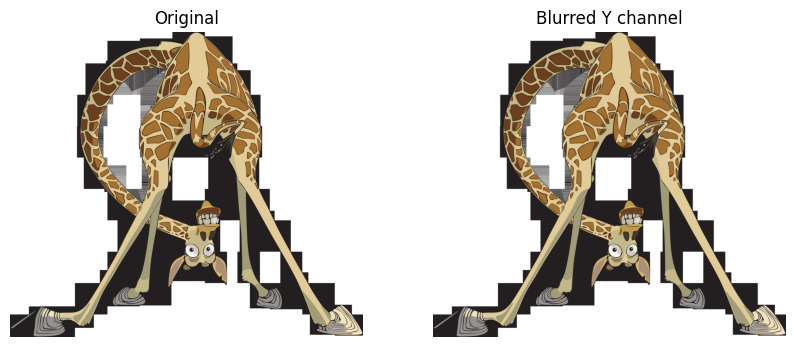

In [ ]:
def process_ycrcb(input_path):
    img = cv2.imread(input_path)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    y, cr, cb = cv2.split(ycrcb)

    y_blur = cv2.GaussianBlur(y, (5, 5), 0)

    ycrcb_new = cv2.merge((y_blur, cr, cb))

    img_new = cv2.cvtColor(ycrcb_new, cv2.COLOR_YCrCb2BGR)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title("Blurred Y channel")
    plt.axis('off')

    plt.show()

process_ycrcb('input.png')

---

# **Тема №3. Слияние и усиление**

## **Задание 5:**  
Создайте процедуру, которая:

- Считывает два изображения одинакового размера (можно подкорректировать с помощью метода `.resize()`).
- Выполняет побитовое ИЛИ (OR) над соответствующими пикселями двух изображений.
- Сохраняет и отображает результат операции.

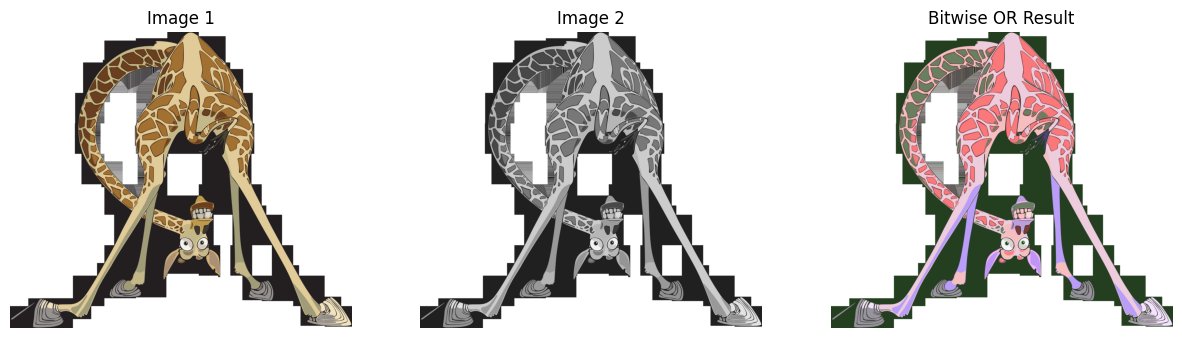

In [ ]:
def process_bitwise_or(path1, path2, output_path):
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)

    if img1 is None or img2 is None:
        print("Error: Could not read images.")
        return

    if img1.shape != img2.shape:
        print("Images have different shapes. Resizing img2 to match img1.")
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


    result = cv2.bitwise_or(img1, img2)

    cv2.imwrite(output_path, result)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Image 1")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("Image 2")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Bitwise OR Result")
    plt.axis('off')

    plt.show()

process_bitwise_or('input.png', 'output_gray.png', 'output_or.jpg')

## **Задание 6:**  
Реализуйте следующий алгоритм:

- Считайте цветное изображение и разделите его на три канала с использованием `.split()`.
- Примените к каждому каналу разный коэффициент гамма-коррекции (например, для R – 0.5, G – 1.0, B – 1.5).
- Объедините каналы обратно с помощью `.merge()`.
- Отобразите исходное и обработанное изображения.


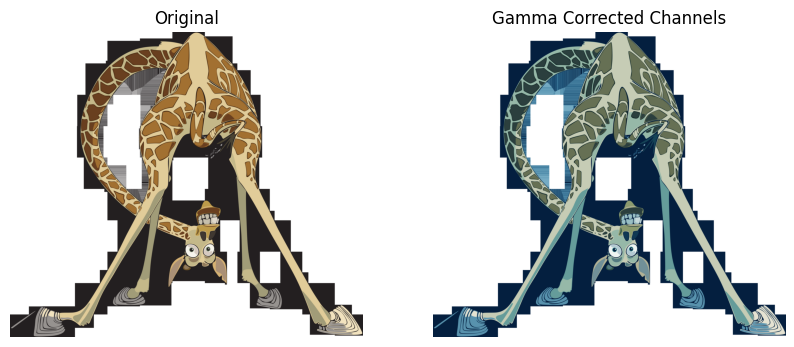

In [ ]:
def adjust_gamma(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

def process_gamma_correction(input_path):
    img = cv2.imread(input_path)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    b, g, r = cv2.split(img)

    r_corrected = adjust_gamma(r, 0.5)
    g_corrected = adjust_gamma(g, 1.0)
    b_corrected = adjust_gamma(b, 1.5)

    img_new = cv2.merge((b_corrected, g_corrected, r_corrected))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title("Gamma Corrected Channels")
    plt.axis('off')

    plt.show()

process_gamma_correction('input.png')

---

# **Тема №4. Работа с гистограммами в OpenCV**

## **Задание 7:**  
Напишите процедуру для улучшения контрастности изображения:

- Считывает изображение в оттенках серого.
- Строит его гистограмму с использованием `cv.calcHist()`.
- Применяет эквализацию гистограммы методом `cv2.equalizeHist()`.
- Отображает на одном графике исходное и эквализованное изображения вместе с их гистограммами.

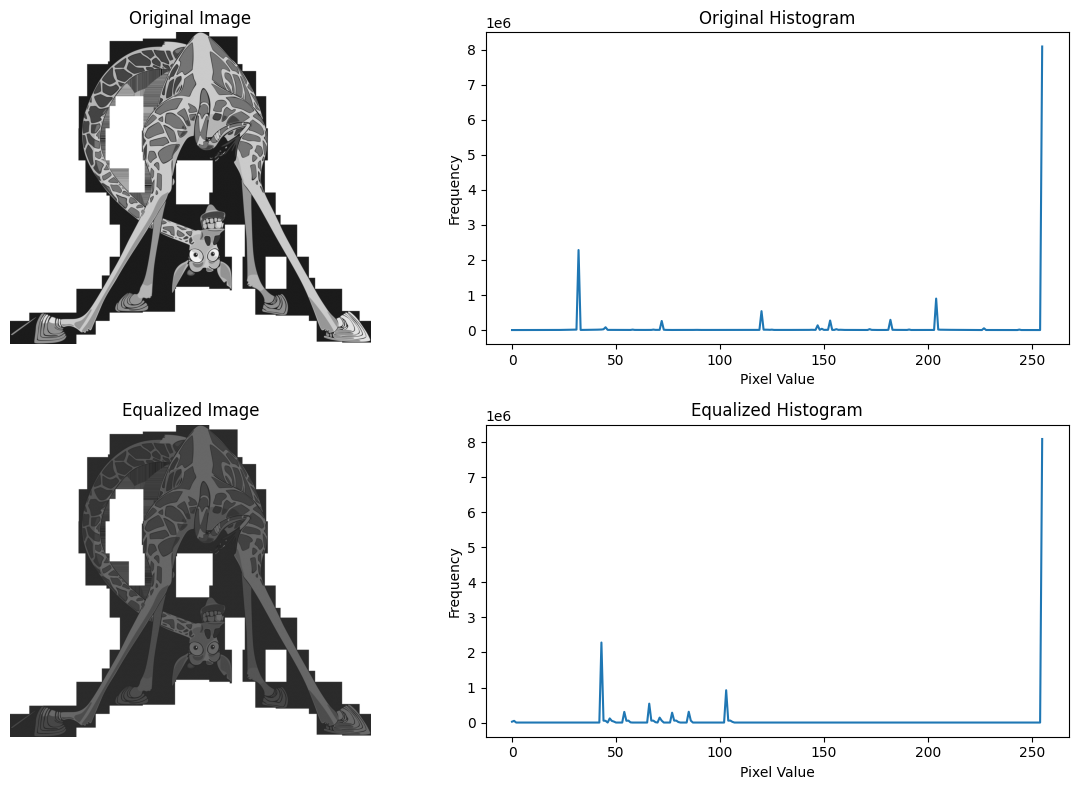

In [ ]:
def process_histogram_equalization(input_path):
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    img_eq = cv2.equalizeHist(img)

    hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.plot(hist)
    plt.title("Original Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 3)
    plt.imshow(img_eq, cmap='gray')
    plt.title("Equalized Image")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title("Equalized Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

process_histogram_equalization('input_gray.png')

## **Задание 8:**  
Используйте метод CLAHE для улучшения деталей в затемненных областях цветного изображения:

- Преобразуйте изображение из BGR в LAB цветовое пространство.
- Разделите изображение на каналы и примените `cv2.createCLAHE()` к каналу яркости L.
- Объедините обработанный канал L с исходными каналами A и B.
- Преобразуйте изображение обратно в BGR.
- Отобразите исходное и обработанное изображения для сравнения вместе с их гистограммами.

/tmp/ipython-input-2641622263.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
/tmp/ipython-input-2641622263.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_new.ravel(), 256, [0, 256])


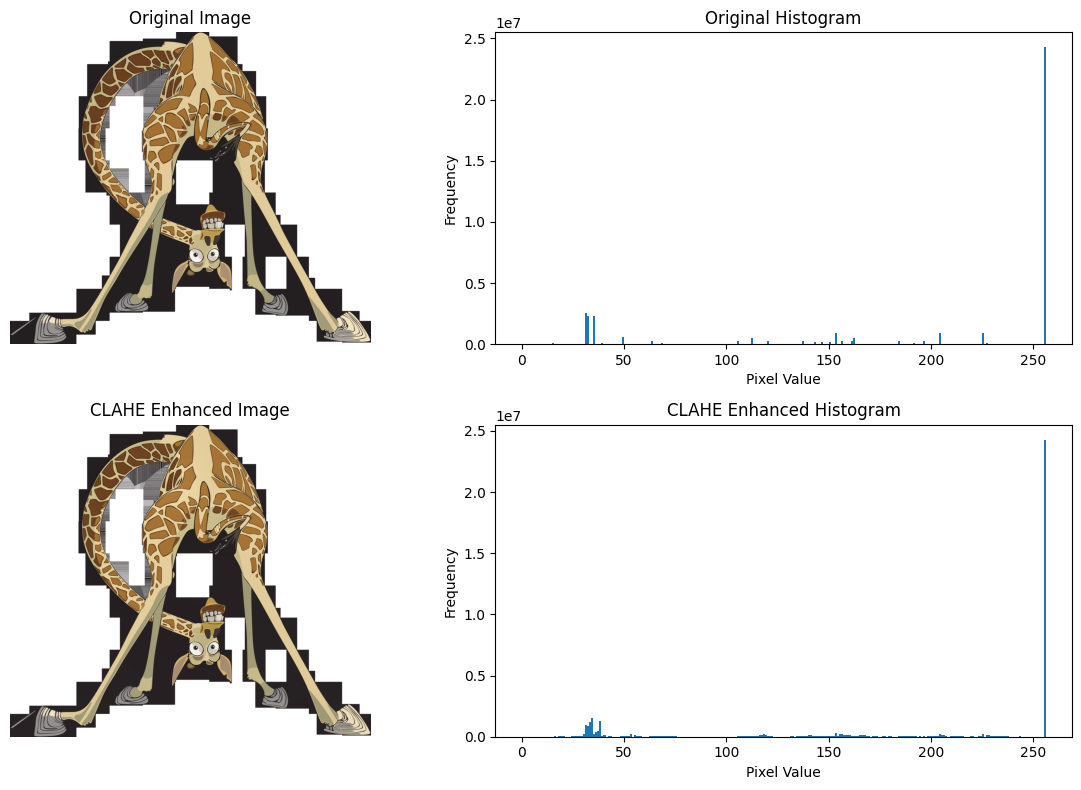

In [ ]:
def process_clahe(input_path):
    img = cv2.imread(input_path)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)

    lab_new = cv2.merge((l_eq, a, b))
    img_new = cv2.cvtColor(lab_new, cv2.COLOR_LAB2BGR)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title("Original Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")


    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title("CLAHE Enhanced Image")
    plt.axis('off')


    plt.subplot(2, 2, 4)
    plt.hist(img_new.ravel(), 256, [0, 256])
    plt.title("CLAHE Enhanced Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")


    plt.tight_layout()
    plt.show()

process_clahe('input.png')

## **Затем:**  
Исследуйте влияние размера окна (tileGridSize) и порога по сравнению с гистограммой (clipLimit) в методе CLAHE на конечный результат. Попробуйте несколько различных значений и визуализируйте результаты.


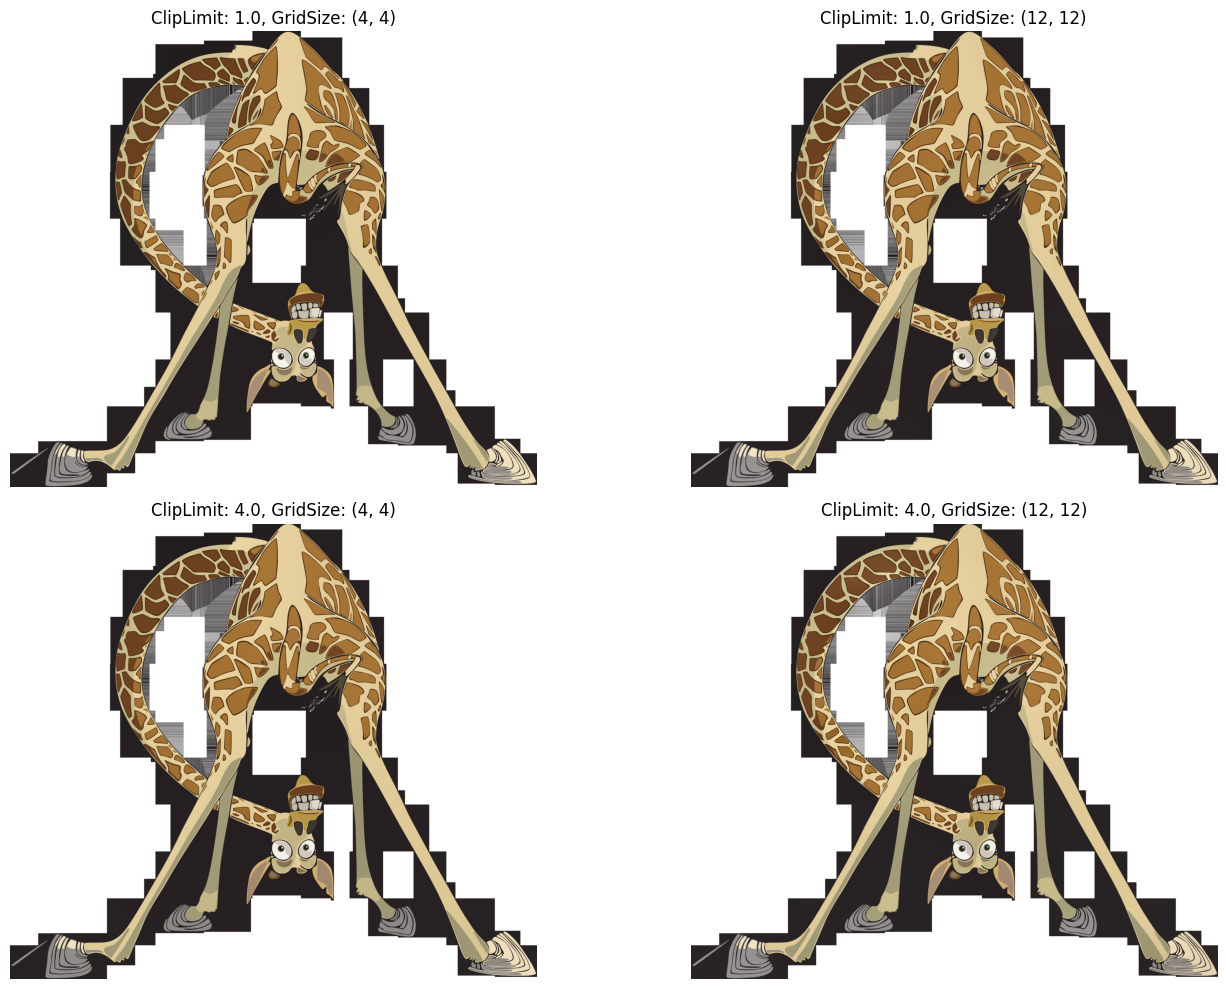

In [ ]:
def explore_clahe_params(input_path):
    img = cv2.imread(input_path)

    if img is None:
        print(f"Error: Could not read image from {input_path}")
        return

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clip_limits = [1.0, 4.0]
    grid_sizes = [(4, 4), (12, 12)]

    plt.figure(figsize=(15, 10))

    for i, clip in enumerate(clip_limits):
        for j, grid in enumerate(grid_sizes):
            clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=grid)
            l_eq = clahe.apply(l)
            lab_new = cv2.merge((l_eq, a, b))
            img_new = cv2.cvtColor(lab_new, cv2.COLOR_LAB2BGR)

            plt.subplot(len(clip_limits), len(grid_sizes), i * len(grid_sizes) + j + 1)
            plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
            plt.title(f"ClipLimit: {clip}, GridSize: {grid}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

explore_clahe_params('input.png')

---

# **Комплексное задание №1. Улучшение качества отсканированного документа с использованием OpenCV**



## **Краткое описание задания:**

- Необходимо написать функцию для улучшения качества отсканированного документа с использованием методов обработки изображений, изученных ранее. Функция должна принимать на вход изображение отсканированного документа и возвращать его улучшенную версию, готовую для дальнейшего использования, например, для распознавания текста.

Датасет с отсканированными изображениями можно найти в сети Интернет.

---



## **Алгоритм действий:**

#### **Реализуйте функцию на языке Python с использованием библиотеки OpenCV, которая выполняет следующие этапы обработки:**

### **1. Чтение, запись и отображение изображений:**

- Функция должна принимать на вход изображение отсканированного документа (например, в формате JPEG или PNG)
- Проверьте наличие альфа-канала в изображении и, если он присутствует, загрузите изображение в режиме `cv2.IMREAD_UNCHANGED`, иначе используйте `cv2.IMREAD_COLOR`
- Отобразите исходное изображение для визуальной проверки

### **2. Работа с цветовыми палитрами:**

- Преобразуйте изображение в оттенки серого, используя `cv2.cvtColor()` с параметром `cv2.COLOR_BGR2GRAY`.
- Отобразите полученное изображение в оттенках серого.

### **3. Слияние и усиление:**

- Примените медианный фильтр (`cv2.medianBlur()`) для удаления шумов с изображения. Выберите подходящий размер ядра (например, 3 или 5). Отобразите результат.
- Используйте фильтр сглаживания с применением прямой свертки (`cv2.filter2D()`) с заданным ядром для повышения четкости. Например, можно использовать фильтр "Unsharp Masking":
  - Создайте ядро для повышения резкости. Пример ядра:
    ```python
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    ```
  - Примените фильтр к изображению и отобразите результат.

### **4. Работа с гистограммами:**

- Примените метод CLAHE (Contrast Limited Adaptive Histogram Equalization) для улучшения контрастности изображения:
  - Создайте объект CLAHE с параметрами `clipLimit=2.0` и `tileGridSize=(8,8)`.
  - Примените CLAHE к изображению.
  - отобразите результат.
- Постройте гистограммы яркости исходного и обработанного изображений для сравнения.

---

### **Требования к функции:**

- Функция должна называться: `improve_scan(image)`, где `image` — входное изображение в виде массива NumPy.
- Функция должна возвращать улучшенное изображение в виде массива NumPy.
- В ходе работы функция должна **опционально** отображать промежуточные результаты для наглядности (в условиях Colab использовать соответствующие методы вывода изображений). Для этого следует ввести отдельный параметр (например: `visible=True`) и реализовать с ним соответствующую логику.

---

### **Дополнительные требования:**

- **Обработка ошибок:**
  - Убедитесь, что функция корректно обрабатывает ситуации, когда на вход подается некорректное изображение.
  - Добавьте проверки на тип входных данных.

- **Документация и комментарии:**
  - Функция должна быть снабжена понятной документацией: опишите, какие преобраования выполняются и для чего.
  - Добавьте комментарии к основным участкам кода для пояснения выполняемых действий.



---

### **Подсказки и рекомендации:**


- **Медианный фильтр:**
  Функция `cv2.medianBlur(src, ksize)` принимает на вход изображение и размер ядра (должен быть нечетным числом).

- **CLAHE:**
  - Создайте объект CLAHE с помощью `cv2.createCLAHE(clipLimit, tileGridSize)`.
  - Примените метод `apply()` к изображению в оттенках серого.

- **Отображение изображений в Google Colab:**
  - Используйте `matplotlib.pyplot` для отображения изображений.
  - Помните, что `cv2.imread()` загружает изображения в формате BGR, поэтому для корректного отображения в Matplotlib Преобразуйте изображение в RGB с помощью `cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`.

---

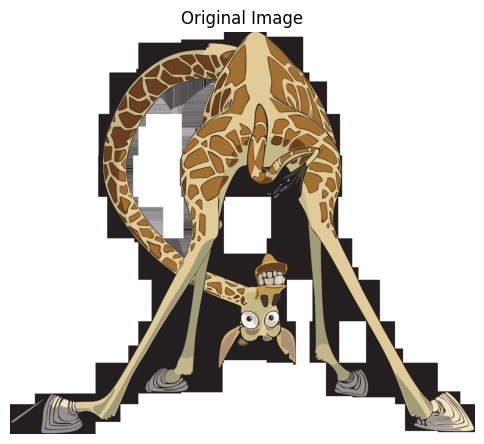

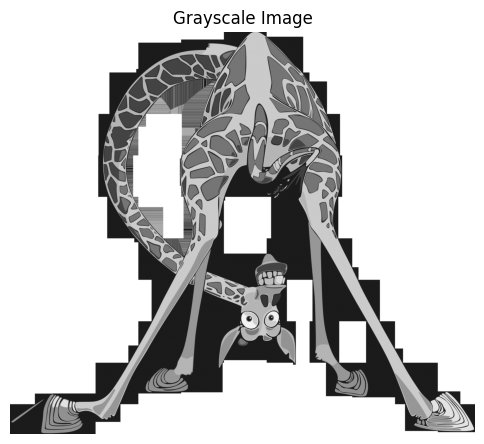

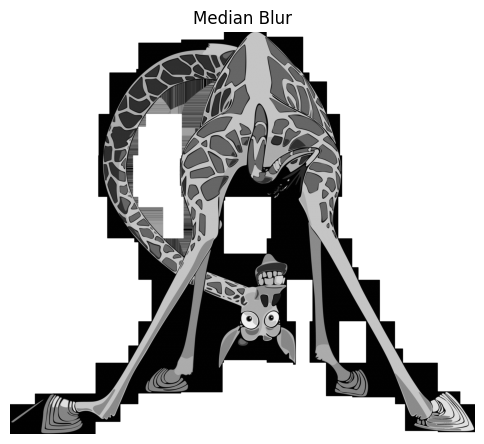

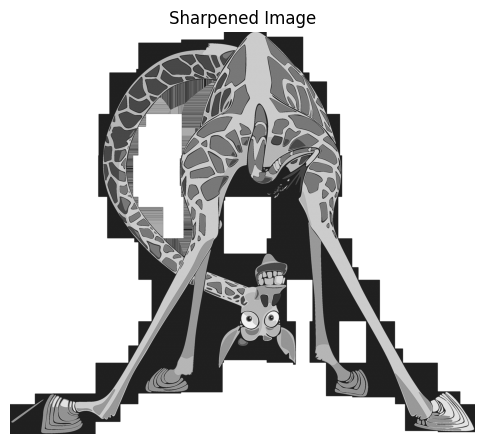

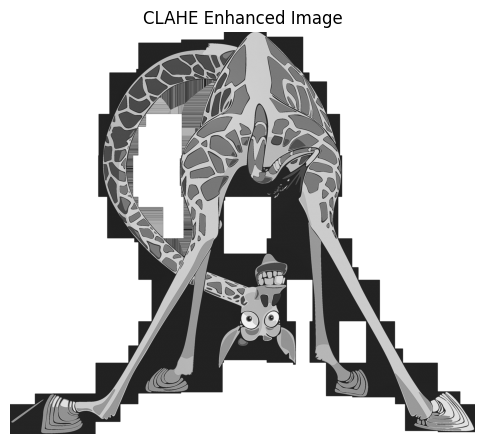

/tmp/ipython-input-1842483482.py:92: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0, 256])
/tmp/ipython-input-1842483482.py:98: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_clahe.ravel(), 256, [0, 256])


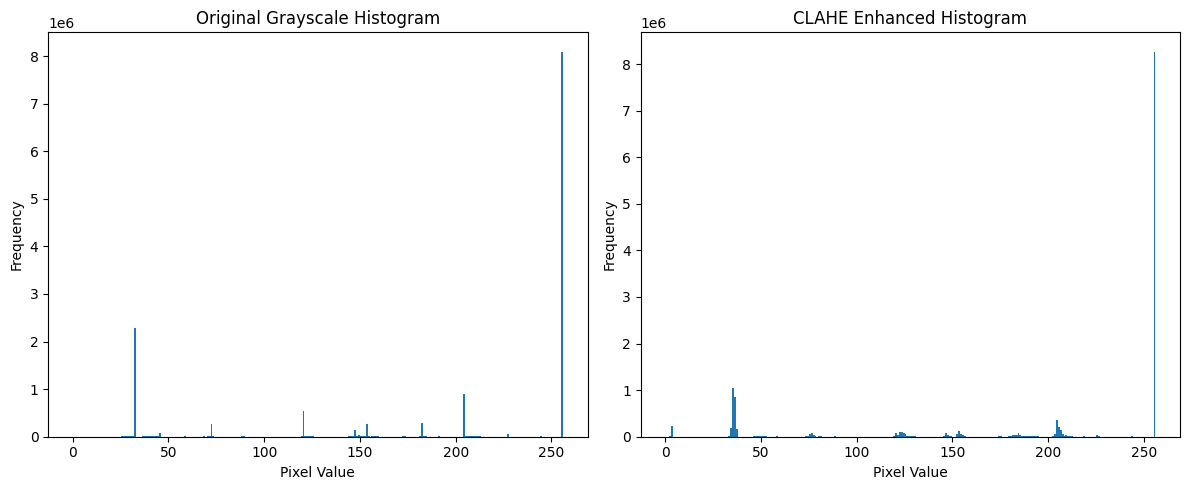

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def improve_scan(image,
                 median_kernel_size=5,
                 sharp_kernel= np.array([[-1, -1, -1],
                                         [-1,  9, -1],
                                         [-1, -1, -1]]),
                 clahe_clip=2.0,
                 clahe_grid=(8,8),
                 visible=True):
    """
    Улучшает качество отсканированного документа.

    Args:
        image (np.ndarray): Входное изображение отсканированного документа.
        median_kernel_size (int): Размер ядра медианного фильтра (нечетное число).
        sharp_kernel (np.ndarray): Ядро для фильтра повышения резкости.
        clahe_clip (float): Порог по сравнению с гистограммой для CLAHE.
        clahe_grid (tuple): Размер окна для CLAHE.
        visible (bool): Если True, отображает промежуточные результаты.

    Returns:
        np.ndarray: Улучшенное изображение.
    """
    if not isinstance(image, np.ndarray):
        print("Error: Input must be a NumPy array.")
        return None

    # 1. Чтение, запись и отображение изображений (Reading is done before calling the function)
    if visible:
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show()

    # Check for alpha channel and convert if necessary
    if image.shape[2] == 4:
        # Assuming BGRA format if 4 channels
        b, g, r, a = cv2.split(image)
        img_color = cv2.merge((b, g, r))
    else:
        img_color = image


    # 2. Работа с цветовыми палитрами: Преобразование в оттенки серого
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    if visible:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_gray, cmap='gray')
        plt.title("Grayscale Image")
        plt.axis('off')
        plt.show()

    # 3. Слияние и усиление: Медианный фильтр для удаления шумов
    if median_kernel_size % 2 == 0:
        print("Warning: Median kernel size must be odd. Using default size 5.")
        median_kernel_size = 5
    img_blur = cv2.medianBlur(img_gray, median_kernel_size)
    if visible:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_blur, cmap='gray')
        plt.title("Median Blur")
        plt.axis('off')
        plt.show()

    # 3. Слияние и усиление: Фильтр сглаживания для повышения четкости (Unsharp Masking)
    img_sharp = cv2.filter2D(img_blur, -1, sharp_kernel)
    if visible:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_sharp, cmap='gray')
        plt.title("Sharpened Image")
        plt.axis('off')
        plt.show()

    # 4. Работа с гистограммами: CLAHE для улучшения контрастности
    clahe = cv2.createCLAHE(clipLimit=clahe_clip, tileGridSize=clahe_grid)
    img_clahe = clahe.apply(img_sharp)
    if visible:
        plt.figure(figsize=(6, 6))
        plt.imshow(img_clahe, cmap='gray')
        plt.title("CLAHE Enhanced Image")
        plt.axis('off')
        plt.show()

    # 4. Работа с гистограммами: Построение гистограмм
    if visible:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(img_gray.ravel(), 256, [0, 256])
        plt.title("Original Grayscale Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

        plt.subplot(1, 2, 2)
        plt.hist(img_clahe.ravel(), 256, [0, 256])
        plt.title("CLAHE Enhanced Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


    return img_clahe

input_image = cv2.imread('input.png', cv2.IMREAD_UNCHANGED)
if input_image is not None:
   improved_image = improve_scan(input_image, visible=True)
   if improved_image is not None:
       cv2.imwrite('improved_document.jpg', improved_image)
else:
   print("Error: Could not load the input image.")

## **Дополнительное задание:**

- Поэкспериментируйте с параметрами медианного фильтра, ядром для фильтра повышения резкости и параметрами CLAHE для достижения наилучшего результата.
- Добавьте возможность передачи этих параметров в функцию `improve_scan` для более гибкой настройки обработки. **В качестве параметров по умолчанию установите те, которые показали себя лучше всего по результатам экспериментов**

**Пример с параметрами:**

```python
def improve_scan(image,
                 median_kernel_size=3,
                 sharp_kernel= np.array([[-1, -1, -1],
                                         [-1,  9, -1],
                                         [-1, -1, -1]]),
                 clahe_clip=2.0,
                 clahe_grid=(8,8),
                 visible=True):
    # Реализация с учетом переданных параметров
    ...
```


In [ ]:
# Ваш код